In [ ]:
# !pip install dataprep

In [ ]:
! pip install openai_whisper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 17.3 MB/s eta 0:00:00


In [ ]:
from openai_whisper import Whisper

whisper = Whisper()
audio_file = "/content/Recording (1).m4a"
transcription = whisper.transcribe(audio_file)
print(transcription)

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
dataset = pd.read_csv(r"/content/SEQ 5_6_Predictions.csv",engine ='c')


# CHECKING NULL VALUES

In [ ]:
dataset.isnull().sum()

Day                  3585
SEQ. 5                  0
Predicted_LSTMS      5508
SEQ. 6                  0
Predicted_LSTMS.1    5508
SEQ. 7                  0
Predicted_LSTMS.2    5508
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                1923 non-null   object 
 1   SEQ. 5             5508 non-null   int64  
 2   Predicted_LSTMS    0 non-null      float64
 3   SEQ. 6             5508 non-null   float64
 4   Predicted_LSTMS.1  0 non-null      float64
 5   SEQ. 7             5508 non-null   float64
 6   Predicted_LSTMS.2  0 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 301.3+ KB


In [ ]:
dataset['Day'] = dataset.reset_index().index.values+1
days = dataset['Day']

# NORMALIZING TIME SERIES

In [ ]:
# # Divide each value in each column by the first value of that column
# for col in dataset.columns:
#     dataset[col] = dataset[col] / dataset[col].iloc[0]

In [ ]:
import pandas as pd

def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())


dataset = min_max_scaling(dataset)


In [ ]:
dataset['Day'] = days
dataset.head()


,Day,SEQ. 5,Predicted_LSTMS,SEQ. 6,Predicted_LSTMS.1,SEQ. 7,Predicted_LSTMS.2
0,1,0.022177,NaN,0.568990,NaN,0.568990,NaN
1,2,0.026210,NaN,0.448209,NaN,0.448209,NaN
2,3,0.066532,NaN,0.422346,NaN,0.422346,NaN
3,4,0.008065,NaN,0.551662,NaN,0.551662,NaN
4,5,0.080645,NaN,0.594853,NaN,0.594853,NaN


## ADDING SOME MORE FEATUES WITH THE HELP OF ROLLING AVERAGES

In [ ]:
import pandas as pd

window_size = 10

dataset_rolling = dataset.rolling(window=window_size, min_periods=1)

dataset_rolling_mean = dataset_rolling.mean().add_suffix('_mean')

dataset = pd.concat([dataset, dataset_rolling_mean], axis=1)


In [ ]:
dataset.drop(columns=['Day_mean'], inplace=True)

In [ ]:
dataset.head()

,SEQ. 1,SEQ. 2,SEQ. 3,SEQ. 4,SEQ. 4A,SEQ. 4B,Day,SEQ. 1_mean,SEQ. 2_mean,SEQ. 3_mean,SEQ. 4_mean,SEQ. 4A_mean,SEQ. 4B_mean
0,13.267,7.611,7.353,4,12,12,1,13.267000,7.6110,7.353000,4.00,12.00,12.00
1,12.333,7.108,6.867,5,14,14,2,12.800000,7.3595,7.110000,4.50,13.00,13.00
2,12.133,6.812,6.581,12,34,34,3,12.577667,7.1770,6.933667,7.00,20.00,20.00
3,13.133,7.999,7.728,2,5,5,4,12.716500,7.3825,7.132250,5.75,16.25,16.25
4,13.467,7.800,7.535,14,36,41,5,12.866600,7.4660,7.212800,7.40,20.20,21.20


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt


# # create a line chart for each feature to visualize the data over time
# fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
# axs = axs.flatten()

# # set a common title for the figure
# fig.suptitle('Time Series Data Visualization', fontsize=16, fontweight='bold')

# # iterate over each column in the dataset and create a scatter plot
# for i, col in enumerate(dataset.columns):
#     axs[i].scatter(dataset['Day'], dataset[col])
    
#     # set individual titles for each subplot
#     axs[i].set_title(col, fontsize=14, fontweight='bold')
    
#     # set axis labels
#     axs[i].set_xlabel('Date', fontsize=12)
#     axs[i].set_ylabel('Value', fontsize=12)
    
#     # set ticks and gridlines
#     axs[i].tick_params(axis='both', which='major', labelsize=10)
#     axs[i].grid(True, linestyle='--', color='lightgrey')

# # adjust the spacing between subplots
# plt.tight_layout()

# # show the plot
# plt.show()


In [ ]:
# # Create subplots for each feature using Plotly
# fig = make_subplots(rows=3, cols=2, subplot_titles=('Distribution of s1', 'Distribution of s2', 'Distribution of s3', 'Line Plot of s1'))

# # Add histograms for each feature to the subplots
# fig.add_trace(px.histogram(dataset, x='s1', nbins=50, opacity=0.7, marginal='box', barmode='overlay').data[0], row=1, col=1)
# fig.add_trace(px.histogram(dataset, x='s2', nbins=50, opacity=0.7, marginal='box', barmode='overlay').data[0], row=1, col=2)
# fig.add_trace(px.histogram(dataset, x='s3', nbins=50, opacity=0.7, marginal='box', barmode='overlay').data[0], row=2, col=1)
# fig.add_trace(go.Scatter(x=dataset['Day'], y=dataset['s1'], mode='lines', name='s1'), row=2, col=2)

# # Set the title and axis labels for the plot
# fig.update_layout(title='Distribution and Line Plot of Features s1, s2, s3', height=800, width=800)
# fig.update_xaxes(title_text='Feature Value')
# fig.update_yaxes(title_text='Count', row=1, col=1)
# fig.update_yaxes(title_text='Count', row=1, col=2)
# fig.update_yaxes(title_text='Count', row=2, col=1)
# fig.update_yaxes(title_text='Feature Value', row=2, col=2)

# # Customize the plot layout and appearance
# # fig.update_traces(marker=dict(color=['rgb(25,10,0)']), showlegend=True)

# # Show the plot
# fig.show()


# OUTLIER DETECTION

In [ ]:
# Create boxplots for every column in the dataset
fig = go.Figure()
for col in dataset.columns:
    if col in ['Day']:  # skip date column
        continue
    fig.add_trace(go.Box(y=dataset[col], name=col, boxpoints='outliers'))

# Set the title and axis labels for the plot
fig.update_layout(title='Boxplots of Time Series Data (s1,s2,s3)', xaxis_title='Columns', yaxis_title='Value')

# Customize the box plot appearance and layout
fig.update_traces(marker=dict(size=6), jitter=0.9, boxmean=True)
fig.update_layout(showlegend=False, height=800, width=1000)

# Show the plot
fig.show()


In [ ]:
# Create boxplots for every column in the dataset
fig = go.Figure()

fig.add_trace(go.Box(y=dataset['SEQ. 4'], name='SEQ. 4', boxpoints='outliers'))

# Set the title and axis labels for the plot
fig.update_layout(title='Boxplots of Time Series Data (SEQ. 4)', xaxis_title='Columns', yaxis_title='Value')

# Customize the box plot appearance and layout
fig.update_traces(marker=dict(size=6), jitter=0.9, boxmean=True)
fig.update_layout(showlegend=False, height=600, width=700)

# Show the plot
fig.show()


In [ ]:
# Create boxplots for every column in the dataset
fig = go.Figure()

fig.add_trace(go.Box(y=dataset['SEQ. 4A'], name='SEQ. 4A', boxpoints='outliers'))

# Set the title and axis labels for the plot
fig.update_layout(title='Boxplots of Time Series Data (SEQ. 4A)', xaxis_title='Columns', yaxis_title='Value')

# Customize the box plot appearance and layout
fig.update_traces(marker=dict(size=6), jitter=0.9, boxmean=True)
fig.update_layout(showlegend=False, height=600, width=700)

# Show the plot
fig.show()


In [ ]:
# Create boxplots for every column in the dataset
fig = go.Figure()

fig.add_trace(go.Box(y=dataset['SEQ. 4B'], name='SEQ. 4A', boxpoints='outliers'))

# Set the title and axis labels for the plot
fig.update_layout(title='Boxplots of Time Series Data (SEQ. 4B)', xaxis_title='Columns', yaxis_title='Value')

# Customize the box plot appearance and layout
fig.update_traces(marker=dict(size=6), jitter=0.9, boxmean=True)
fig.update_layout(showlegend=False, height=600, width=700)

# Show the plot
fig.show()


**From the 3 boxplots of seq 4, i conclude that SEQ. 4B is much better than SEQ. 4A because in the former, values are much closer to the mean value.**

## OUTLIER REMOVAL USING Z-SCORE

In [ ]:
# import pandas as pd
# import numpy as np

# # Assuming dataset is a pandas DataFrame with columns "s1", "s2", "s3"
# # First, compute the z-scores for each column
# z_scores = (dataset[["s1", "s2", "s3", "SEQ. 4", "SEQ. 4A"]] - dataset[["s1", "s2", "s3", "SEQ. 4", "SEQ. 4A"]].mean()) / dataset[["s1", "s2", "s3", "SEQ. 4", "SEQ. 4A"]].std()

# # Find rows where any of the z-scores is greater than 3 or less than -3
# # row_mask = (np.abs(z_scores) > 3).any(axis=1)
# row_mask = (np.abs(z_scores) >3).sum(axis=1) > 0

# # Drop those rows from the original dataset
# clean_dataset = dataset[~row_mask]

import pandas as pd
import numpy as np

# Assuming dataset is a pandas DataFrame with columns "s1", "s2", "s3"
# and the column to ignore is "ignore_col"
ignore_col = ["SEQ. 4A,", "SEQ. 4A_mean", 'Day']

# First, compute the z-scores for each column
cols_to_check = [col for col in dataset.columns if col not in ignore_col]
z_scores = (dataset[cols_to_check] - dataset[cols_to_check].mean()) / dataset[cols_to_check].std()

# Find rows where any of the z-scores is greater than 3 or less than -3
row_mask = (np.abs(z_scores) > 3).any(axis=1)

# Drop those rows from the original dataset
clean_dataset = dataset[~row_mask]


In [ ]:
import plotly.graph_objects as go

# Create boxplots for every column in the dataset
fig = go.Figure()
for col in clean_dataset.columns:
    if col == 'Day':  # skip date column
        continue
    fig.add_trace(go.Box(y=clean_dataset[col], name=col, boxpoints='outliers'))

# Set the title and axis labels for the plot
fig.update_layout(title='Boxplots of Time Series Data', xaxis_title='Columns', yaxis_title='Value')

# Customize the box plot appearance and layout
fig.update_traces(marker=dict(size=6), jitter=0.9, boxmean=True)
fig.update_layout(showlegend=False, height=800, width=1000)

# Show the plot
fig.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DECIDE WHETHER OR NOT TO SMOOTH OUT THE FEATURES. COULD LEAD TO LOSS OF INFO BUT ALSO SHOW AN OVERALL PATTERN

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming dataset is a pandas DataFrame with columns "s1", "s2", and "s3"
# Apply a rolling window to smooth the values with a window size of 3
window_size = 3
smoothed_dataset = clean_dataset.rolling(window=window_size, center=True).mean()

# Create subplots for s1, s2, and s3
fig = make_subplots(rows=15, cols=1, shared_xaxes=True, subplot_titles=tuple(clean_dataset.columns))

# Loop over the columns in the dataset and add traces for the original and smoothed values
for i, col in enumerate(list(clean_dataset.columns)):
    if col in ['Day']:
      continue

    fig.add_trace(go.Scatter(x=clean_dataset.index, y=clean_dataset[col], mode='lines', name=f'Original {col}'), row=i+1, col=1)
    fig.add_trace(go.Scatter(x=smoothed_dataset.index, y=smoothed_dataset[col], mode='lines', name=f'Smoothed {col}'), row=i+1, col=1)

# Update plot layout and show the plot
fig.update_layout(title='Smoothed vs Original Data', height=1600, width=900)
fig.show()


# CHECKING STATIONARITY IN DATASET

**Our null hypothesis is that data is non-stationary, alternate hypothesis is that data is stationary.**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data, column):
    # Perform ADF test on specified column data
    adf_result = adfuller(data[column], maxlag=1)
    adf_statistic = adf_result[0]
    adf_critical_values = adf_result[4]
    
    # Print the ADF test results
    print(f"ADF test statistic: {adf_statistic}")
    print(f"Critical values: {adf_critical_values}")
    
    # Interpret the test results
    if adf_statistic < adf_critical_values['5%']:
        print(f"The column {column} is stationary with 95% confidence")
        print("Therefore, we are rejecting null hypothesis.")
    elif adf_statistic < adf_critical_values['10%']:
        print(f"The {column} is stationary with 90% confidence")
        print("Therefore, we are rejecting null hypothesis.")
    elif adf_statistic < adf_critical_values['1%']:
        print(f"The {column} is stationary with 99% confidence")
        print("Therefore, we are rejecting null hypothesis.")
    else:
        print(f"The {column} is non-stationary")
        print("Therefore, we fail to reject null hypothesis")
    print()


In [ ]:
dataset.drop(['Day', 'Predicted_LSTMS', 'Predicted_LSTMS.1', 'Predicted_LSTMS.2'], axis=1, inplace=True)

In [ ]:
dataset

,SEQ. 5,SEQ. 6,SEQ. 7
0,0.022177,0.568990,0.568990
1,0.026210,0.448209,0.448209
2,0.066532,0.422346,0.422346
3,0.008065,0.551662,0.551662
4,0.080645,0.594853,0.594853
...,...,...,...
5503,0.044355,0.474072,0.474072
5504,0.002017,0.525799,0.525799
5505,0.062500,0.646580,0.646580
5506,0.078629,0.767231,0.767231


In [ ]:
clean_dataset=dataset

In [ ]:
for col in clean_dataset.columns:
    if col == 'Day':
        pass
    else:
        adf_test(clean_dataset, col)

ADF test statistic: -73.21800072308632
Critical values: {'1%': -3.431538006308296, '5%': -2.8620649809623995, '10%': -2.567049446173612}
The column SEQ. 5 is stationary with 95% confidence
Therefore, we are rejecting null hypothesis.

ADF test statistic: -74.46958220415829
Critical values: {'1%': -3.431538006308296, '5%': -2.8620649809623995, '10%': -2.567049446173612}
The column SEQ. 6 is stationary with 95% confidence
Therefore, we are rejecting null hypothesis.

ADF test statistic: -74.46958220415829
Critical values: {'1%': -3.431538006308296, '5%': -2.8620649809623995, '10%': -2.567049446173612}
The column SEQ. 7 is stationary with 95% confidence
Therefore, we are rejecting null hypothesis.



# CHECKING AND POSSIBLY REMOVING SEASONALITY

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonality(dataset, period):
    """
    Loop over the columns of a dataset, perform seasonal decomposition on each column,
    and display the results.
    
    Args:
    - dataset: a pandas DataFrame containing the time series data
    - period: the period of seasonality in the data (default: 12)
    """
    
    for col in dataset.columns:
        if col == 'Day':
          pass
        # Convert the column to a time series
        ts = pd.to_datetime(dataset[col])
        
        # Create a decomposition of the time series
        decomp = seasonal_decompose(ts, model='additive', period=period)
        
        # Plot the decomposed time series
        fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(7, 8))
        axes[0].set_title(f"Seasonal Decomposition of {col}")
        decomp.observed.plot(ax=axes[0])
        axes[0].set_ylabel('Observed')
        decomp.trend.plot(ax=axes[1])
        axes[1].set_ylabel('Trend')
        decomp.seasonal.plot(ax=axes[2])
        axes[2].set_ylabel('Seasonal')
        decomp.resid.plot(ax=axes[3])
        axes[3].set_ylabel('Residual')
        plt.tight_layout()
        plt.show()


Here's what's happening in the code:

1. We define a function called plot_seasonality that takes a dataset and a period argument as inputs.

2. The function loops over each column in the dataset.
For each column, the function converts it to a time series and creates a seasonal decomposition using the seasonal_decompose function from statsmodels.

3. The function then plots the original time series, trend, seasonality, and residual components using matplotlib, with each component on a separate subplot.

4. Finally, the function displays the plot using plt.show().

When you call this function with your dataset, it will produce a series of plots showing the seasonal decomposition of each column, allowing you to visually inspect the seasonality and other components of the data.

In [ ]:
start_date = '2022-01-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(days=len(clean_dataset)-1)
date_range = pd.date_range(start_date, end_date, freq='D')
clean_dataset['Day'] = date_range
clean_dataset.set_index('Day', inplace=True)

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2023,12,1)
test_dataset_end=datetime(2029,3,7)

train_data=clean_dataset[:train_dataset_end]
test_data=clean_dataset[train_dataset_end+timedelta(days=1):test_dataset_end]

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
train_data.describe()

,SEQ. 5,SEQ. 6,SEQ. 7
count,700.000000,700.000000,700.000000
mean,0.057028,0.533232,0.533232
std,0.082254,0.149019,0.149019
min,0.000000,0.068925,0.068925
25%,0.006049,0.431010,0.431010
50%,0.022177,0.538795,0.538795
75%,0.068549,0.646580,0.646580
max,0.447580,0.965473,0.965473


In [ ]:
model_ARIMA=ARIMA(train_data['SEQ. 5'],order=(2,1,1))
model_Arima_fit=model_ARIMA.fit()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['SEQ. 5']-pred

<Axes: ylabel='Density'>

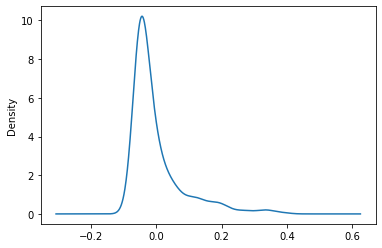

In [ ]:
model_Arima_fit.resid.plot(kind='kde')


In [ ]:
test_data['Predicted_ARIMA']=pred


<ipython-input-41-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


In [ ]:
test_data['SEQ. 5']

Day
2023-12-02    0.207662
2023-12-03    0.000000
2023-12-04    0.284275
2023-12-05    0.022177
2023-12-06    0.036291
                ...   
2029-03-03    0.016129
2029-03-04    0.002017
2029-03-05    0.006049
2029-03-06    0.000000
2029-03-07    0.026210
Name: SEQ. 5, Length: 1923, dtype: float64

In [ ]:
test_data['Predicted_ARIMA']

Day
2023-12-02    0.055170
2023-12-03    0.056554
2023-12-04    0.056946
2023-12-05    0.057001
2023-12-06    0.057016
                ...   
2029-03-03    0.057018
2029-03-04    0.057018
2029-03-05    0.057018
2029-03-06    0.057018
2029-03-07    0.057018
Name: Predicted_ARIMA, Length: 1923, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_true and y_pred are the actual and predicted values of the time series, respectively
# Compute the mean squared error (MSE)
mse = mean_squared_error(test_data['SEQ. 5'], test_data['Predicted_ARIMA'])

# Compute the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("RMSE: ", rmse)


RMSE:  0.0905060402579113


<Axes: xlabel='Day'>

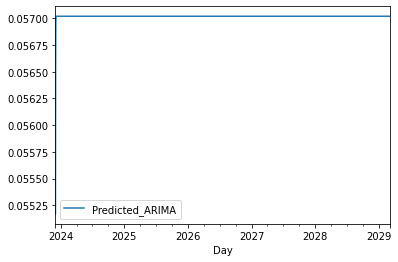

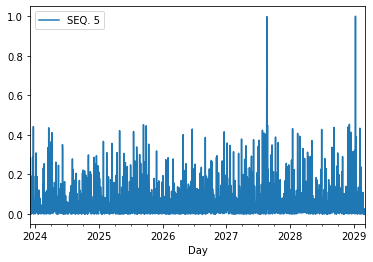

In [ ]:
test_data[['Predicted_ARIMA']].plot()


test_data[['SEQ. 5']].plot()



In [ ]:
# clean_dataset['SEQ. 1'].loc[:2000]

In [ ]:
dd = pd.DataFrame()


In [ ]:
dd['SEQ1'] = test_data['SEQ. 1']
dd['SEQ1_Predicted'] = test_data['Predicted_ARIMA']

KeyError: ignored

In [ ]:
dd['SEQ2'] = test_data['SEQ. 2']
dd['SEQ2_Predicted'] = test_data['Predicted_ARIMA']

In [ ]:
dd['SEQ3'] = test_data['SEQ. 3']
dd['SEQ3_Predicted'] = test_data['Predicted_ARIMA']

In [ ]:
dd['SEQ4'] = test_data['SEQ. 4']
dd['SEQ4_Predicted'] = test_data['Predicted_ARIMA']

In [ ]:
dd['SEQ4_A'] = test_data['SEQ. 4A']
dd['SEQ4_A_Predicted'] = test_data['Predicted_ARIMA']

In [ ]:
dd['SEQ2'] = test_data['SEQ. 4B']
dd['SEQ2_Predicted'] = test_data['Predicted_ARIMA']

In [ ]:
dd

,SEQ1,SEQ1_Predicted,SEQ2,SEQ2_Predicted,SEQ3,SEQ3_Predicted,SEQ4,SEQ4_Predicted,SEQ4_A,SEQ4_A_Predicted
Day,,,,,,,,,,
2023-12-02,10.800,12.982731,4,8.963257,6.242,7.153000,2,8.963257,4,8.963257
2023-12-03,13.467,12.970964,8,9.207488,7.658,7.148906,3,9.207488,8,9.207488
2023-12-04,13.267,12.971202,30,9.217491,6.836,7.149163,10,9.217491,30,9.217491
2023-12-05,12.800,12.971197,26,9.217900,7.314,7.149147,9,9.217900,26,9.217900
2023-12-06,14.467,12.971197,19,9.217917,7.623,7.149148,7,9.217917,19,9.217917
...,...,...,...,...,...,...,...,...,...,...
2029-03-03,12.533,12.971197,23,9.217918,6.771,7.149148,8,9.217918,23,9.217918
2029-03-04,12.933,12.971197,2,9.217918,7.681,7.149148,1,9.217918,2,9.217918
2029-03-05,13.867,12.971197,32,9.217918,7.338,7.149148,11,9.217918,32,9.217918


In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [ ]:
model=ARIMA(clean_dataset['SEQ. 3'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
clean_dataset['forecast']=model_fit.predict(start=2023,end=2029,dynamic=True)
clean_dataset[['forecast']].plot(figsize=(12,8))

In [ ]:
model =Prophet()
model.fit(clean_dataset)


In [ ]:
train = clean_dataset['SEQ. 3'].loc[:'2026-04-04'].values
test = clean_dataset['SEQ. 3'].loc[:'2026-04-04'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
     
scaler.fit(train.reshape(1,-1))
scaled_train = scaler.transform(train.reshape(1,-1))
scaled_test = scaler.transform(test.reshape(1,-1))

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(clean_dataset['SEQ. 3'], clean_dataset['SEQ. 3'], length=n_input, batch_size=1)

In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

ValueError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
     

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
     

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator,epochs=50)


Epoch 1/50
2620/2620 [==============================] - 34s 11ms/step - loss: 0.9901
Epoch 2/50
2620/2620 [==============================] - 23s 9ms/step - loss: 0.4062
Epoch 3/50
2620/2620 [==============================] - 22s 8ms/step - loss: 0.3700
Epoch 4/50
2620/2620 [==============================] - 23s 9ms/step - loss: 0.3791
Epoch 5/50
2620/2620 [==============================] - 24s 9ms/step - loss: 0.3654
Epoch 6/50
2620/2620 [==============================] - 22s 8ms/step - loss: 0.3562
Epoch 7/50
2620/2620 [==============================] - 24s 9ms/step - loss: 0.3576
Epoch 8/50
2620/2620 [==============================] - 24s 9ms/step - loss: 0.3482
Epoch 9/50
2620/2620 [==============================] - 24s 9ms/step - loss: 0.3436
Epoch 10/50
2620/2620 [==============================] - 22s 8ms/step - loss: 0.3430
Epoch 11/50
2620/2620 [==============================] - 24s 9ms/step - loss: 0.3404
Epoch 12/50
2620/2620 [==============================] - 24s 9ms/step - l

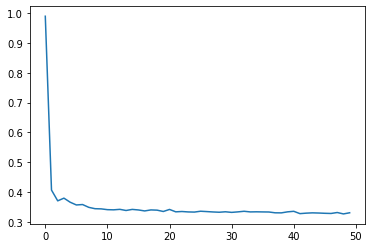

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
     

In [ ]:
model.predict(scaled_test.reshape(1,12,1))


ValueError: ignored

In [ ]:
last_train_batch = scaled_train[-12:]
     

last_train_batch = last_train_batch.reshape((1, n_input, n_features))
     

model.predict(last_train_batch)
scaled_test[0]
     

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

test_predictions

ValueError: ignored

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
     

test['Predictions'] = true_predictions
     

test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)